# Курсовая по курсу GeekBrains Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn

### Загрузка библиотек

In [1]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle
import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2


In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

### Загрузка и сохранение датасетов

In [3]:
DATA_TRAIN_PATH='./train.csv'
DATA_TEST_PATH='./test.csv'
RESULT_PATH='./predictions.csv'
df = pd.read_csv(DATA_TRAIN_PATH, sep=',')
X_test=pd.read_csv(DATA_TEST_PATH, sep=',')

In [4]:
df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [5]:
X_test.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


### Анализ и преобразование данных датасета

In [6]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [7]:
df['Id'] = df['Id'].astype('object')

### Целевая переменная

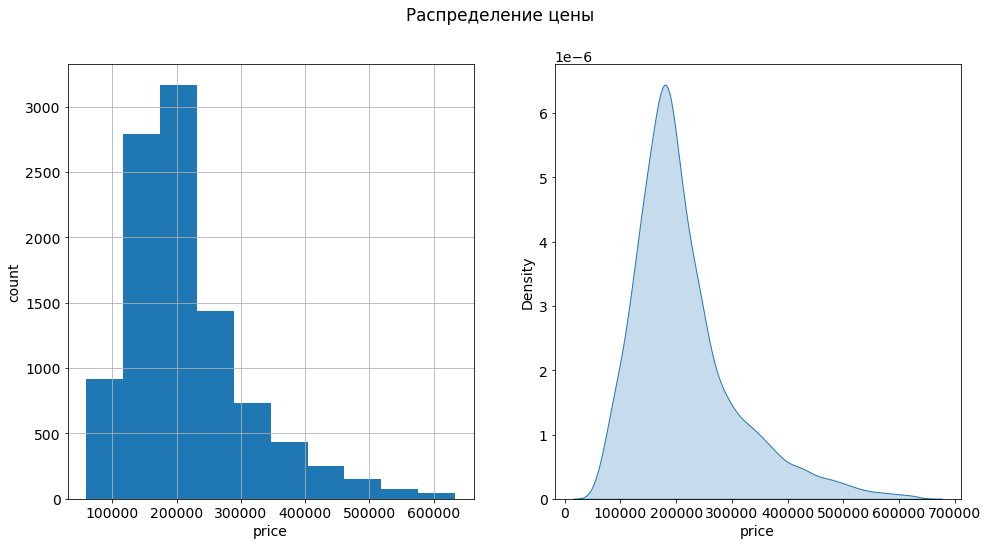

In [8]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price')

plt.suptitle('Распределение цены')
plt.show()

### Описание датасета :
Id - идентификационный номер квартиры
DistrictId - идентификационный номер района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - количество этажей в доме
HouseYear - год постройки дома
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Social_1, Social_2, Social_3 - социальные показатели местности
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Price - цена квартиры

### Визаулизация числовых переменных

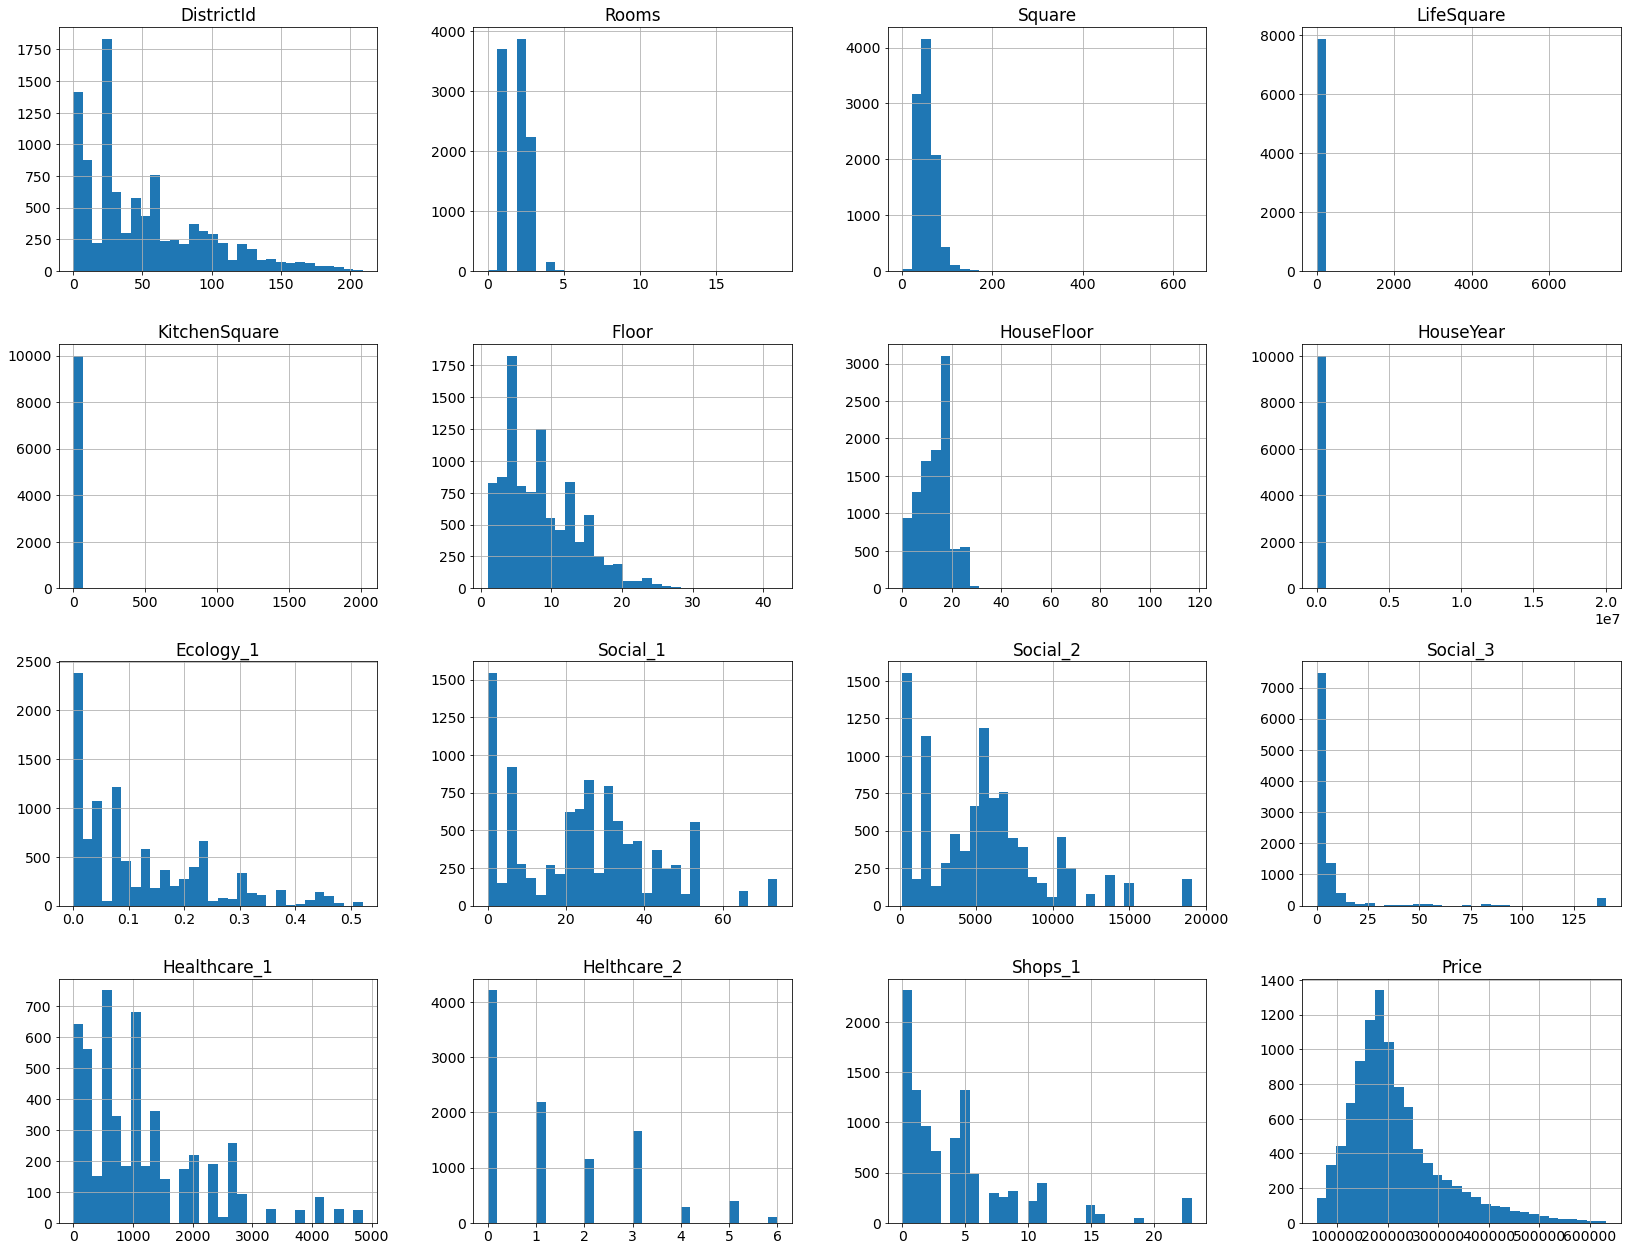

In [9]:
digital_features=df.select_dtypes(exclude=['object'])
digital_features.hist(figsize=(28,22), bins=30)
plt.show()

In [10]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

### Обработка пропусков

In [11]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [12]:
median = df['LifeSquare'].median() # Заменяю пропуски на медиану
df['LifeSquare'].fillna(median, inplace=True)

In [13]:
median = df['Healthcare_1'].median()
df['Healthcare_1'].fillna(median, inplace=True) # Заменяю пропуски на медиану

In [14]:
df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

### Обработка выбросов

In [15]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [16]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [17]:
df.replace(
    {'Rooms':
     {0: df['Rooms'].mode()[0]} # Заменяю 0 на моду
    },
    inplace=True)

df.loc[df['Rooms'] > 5, 'Rooms'] = df['Rooms'].median() # Заменяю выбросы на медиану

In [18]:
df['Rooms'].value_counts()

2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [19]:
df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,0.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,32.781260,0.0
8,64.511437,32.781260,1.0
9,46.461409,18.915552,8.0


In [20]:
df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [21]:
Square_max_value = np.quantile(df['Square'], q=0.975) 
Square_min_value = np.quantile(df['Square'], q=0.025)
condition = (df['Square'] > Square_max_value) | (df['Square'] < Square_min_value) # Заменяю выбросы с помощью квантилей на медиану
df.loc[condition, 'Square'] = df['Square'].median()
df['Square'].describe()

count    10000.000000
mean        55.108599
std         15.215053
min         32.105270
25%         42.432730
50%         52.513310
75%         64.591720
max        100.904263
Name: Square, dtype: float64

In [22]:
df['LifeSquare'].describe()

count    10000.000000
mean        36.266040
std         76.609981
min          0.370619
25%         25.527399
50%         32.781260
75%         41.427234
max       7480.592129
Name: LifeSquare, dtype: float64

In [23]:
LifeSquare_max_value = np.quantile(df['LifeSquare'], q=0.975)
LifeSquare_min_value = np.quantile(df['LifeSquare'], q=0.025)
life = (df['LifeSquare'] > LifeSquare_max_value) | (df['LifeSquare'] < LifeSquare_min_value)
df.loc[life, 'LifeSquare'] = df['LifeSquare'].median()
df['LifeSquare'].describe() # Заменяю выбросы с помощью квантилей на медиану

count    10000.000000
mean        34.534440
std         11.451088
min         15.146290
25%         27.982505
50%         32.781260
75%         39.424685
max         78.384631
Name: LifeSquare, dtype: float64

In [24]:
df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [25]:
df['KitchenSquare'].quantile(.975), df['KitchenSquare'].quantile(.025)
condition = (df['KitchenSquare'].isna()) \
             | (df['KitchenSquare'] > df['KitchenSquare'].quantile(.975))
        
df.loc[condition, 'KitchenSquare'] = df['KitchenSquare'].median()

df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3 # Заменяю выбросы с помощью квантиле на медиану

In [26]:
df['KitchenSquare'].describe()

count    10000.000000
mean         6.238200
std          2.794717
min          3.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: KitchenSquare, dtype: float64

In [27]:
df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [28]:
df['HouseFloor'] = df['HouseFloor'].astype(int)
df['HouseFloor'].dtype

dtype('int32')

In [29]:
df['HouseFloor'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  36,  37,  38,  39,  40,  44,
        45,  47,  48,  99, 117])

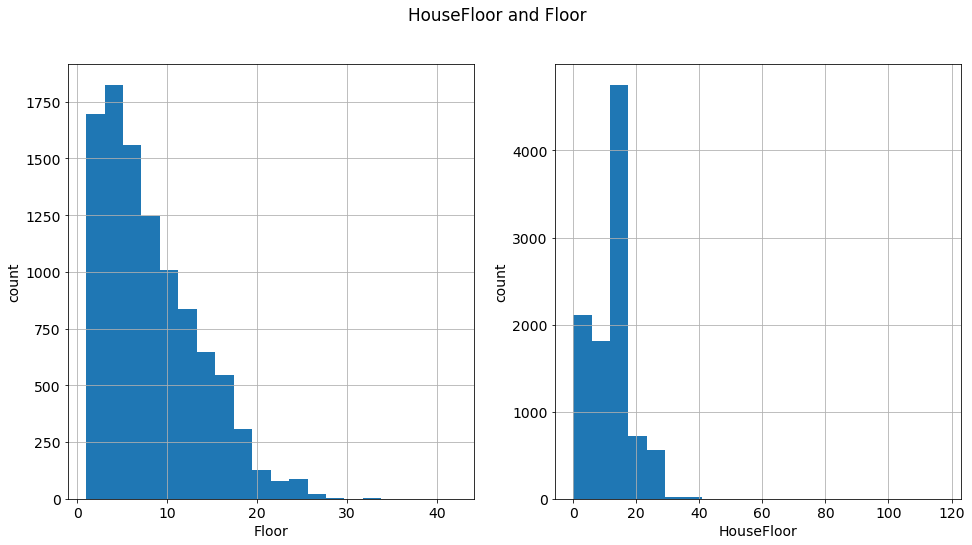

In [30]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Floor'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Floor')

plt.subplot(122)
df['HouseFloor'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('HouseFloor')

plt.suptitle('HouseFloor and Floor ')
plt.show()

In [31]:
df.loc[df['Floor'] > 27, 'Floor'] = df['Floor'].median() # Заменяю выбросы на медиану

df.replace(
    {'HouseFloor':
     {0: df['HouseFloor'].mode()[0]}
    },
    inplace=True)

df.loc[df['HouseFloor'] > 27, 'HouseFloor'] = df['HouseFloor'].median()

In [32]:
(df['Floor'] > df['HouseFloor']).sum() # Этаж больше чем этажей в доме 

1593

In [33]:
transformation = df.loc[df['Floor'] > df['HouseFloor']].index
df.loc[transformation, 'Floor'] = df.loc[transformation, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x)) # Заменяю выбросы медиану

In [34]:
(df['Floor'] > df['HouseFloor']).sum()

0

In [35]:
df['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [36]:
df['HouseYear'] = df['HouseYear'].astype(int)
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2) # Заменяю ошибочные значения 
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968

In [37]:
df['HouseYear'].unique()

array([1969, 1978, 1968, 1977, 1976, 2011, 1960, 2014, 1973, 1959, 1999,
       1980, 1979, 1983, 2001, 2012, 2002, 1996, 1964, 2018, 1972, 1965,
       1984, 1961, 1971, 1963, 2017, 1970, 1981, 2003, 2016, 1991, 1975,
       2006, 2009, 1985, 1974, 1994, 2000, 1987, 1998, 2005, 1990, 1982,
       1997, 2015, 2008, 2010, 2004, 2007, 1967, 1957, 1962, 1993, 1966,
       1955, 1937, 1992, 1954, 1995, 2019, 1948, 1986, 2013, 1989, 1958,
       1938, 1956, 1988, 2020, 1951, 1952, 1935, 1914, 1932, 1950, 1917,
       1918, 1940, 1942, 1939, 1934, 1931, 1919, 1912, 1953, 1936, 1947,
       1929, 1930, 1933, 1941, 1916, 1910, 1928])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int32  
 8   HouseYear      10000 non-null  int32  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [39]:
df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [40]:
df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [41]:
df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [42]:
df.drop(columns='Id', inplace=True) # Удаляю столбец Id

In [43]:
df = pd.get_dummies(df) 

### Создание новых признаков

In [44]:
average_price_areas = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'Average_price_areas'})

average_price_areas.head() # Средняя стоимость жилья по району 

,DistrictId,Rooms,Average_price_areas
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [45]:
df = df.merge(average_price_areas, on=['DistrictId', 'Rooms'], how='left')
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Average_price_areas
0,35,2.0,47.981561,29.442751,6.0,7,9,1969,0.089040,33,...,0,11,184966.930730,0,1,0,1,0,1,207786.135836
1,41,3.0,65.683640,40.049543,8.0,7,9,1978,0.000070,46,...,1,16,300009.450063,0,1,0,1,0,1,300009.450063
2,53,2.0,44.947953,29.197612,3.0,8,12,1968,0.049637,34,...,1,3,220925.908524,0,1,0,1,0,1,263206.223152
3,58,2.0,53.352981,52.731512,9.0,8,17,1977,0.437885,23,...,0,5,175616.227217,0,1,0,1,0,1,166809.665642
4,99,1.0,39.649192,23.776169,7.0,11,12,1976,0.012339,35,...,2,4,150226.531644,0,1,0,1,0,1,158539.052715


In [46]:
df['Houseyear_category'] = 0
df.loc[df['HouseYear'] <= 1941, 'Houseyear_category'] = 1
df.loc[(df['HouseYear'] > 1941) & (df['HouseYear'] <= 1945), 'Houseyear_category'] = 2
df.loc[(df['HouseYear'] > 1945) & (df['HouseYear'] <= 1980), 'Houseyear_category'] = 3
df.loc[(df['HouseYear'] > 1980) & (df['HouseYear'] <= 2000), 'Houseyear_category'] = 4
df.loc[(df['HouseYear'] > 2000) & (df['HouseYear'] <= 2010), 'Houseyear_category'] = 5
df.loc[(df['HouseYear'] > 2010), 'Houseyear_category'] = 6


bins = [df['HouseYear'].min(), 1941, 1945, 1980, 2000, 2010, df['HouseYear'].max()]
df['Houseyear_category'] = pd.cut(df['HouseYear'], bins=bins, labels=False)
    
df['Houseyear_category'].fillna(-1, inplace=True) # Разбиваю на категории по гадам

### Построение Корреляционной матрицы и отбор переменных для обучения модели

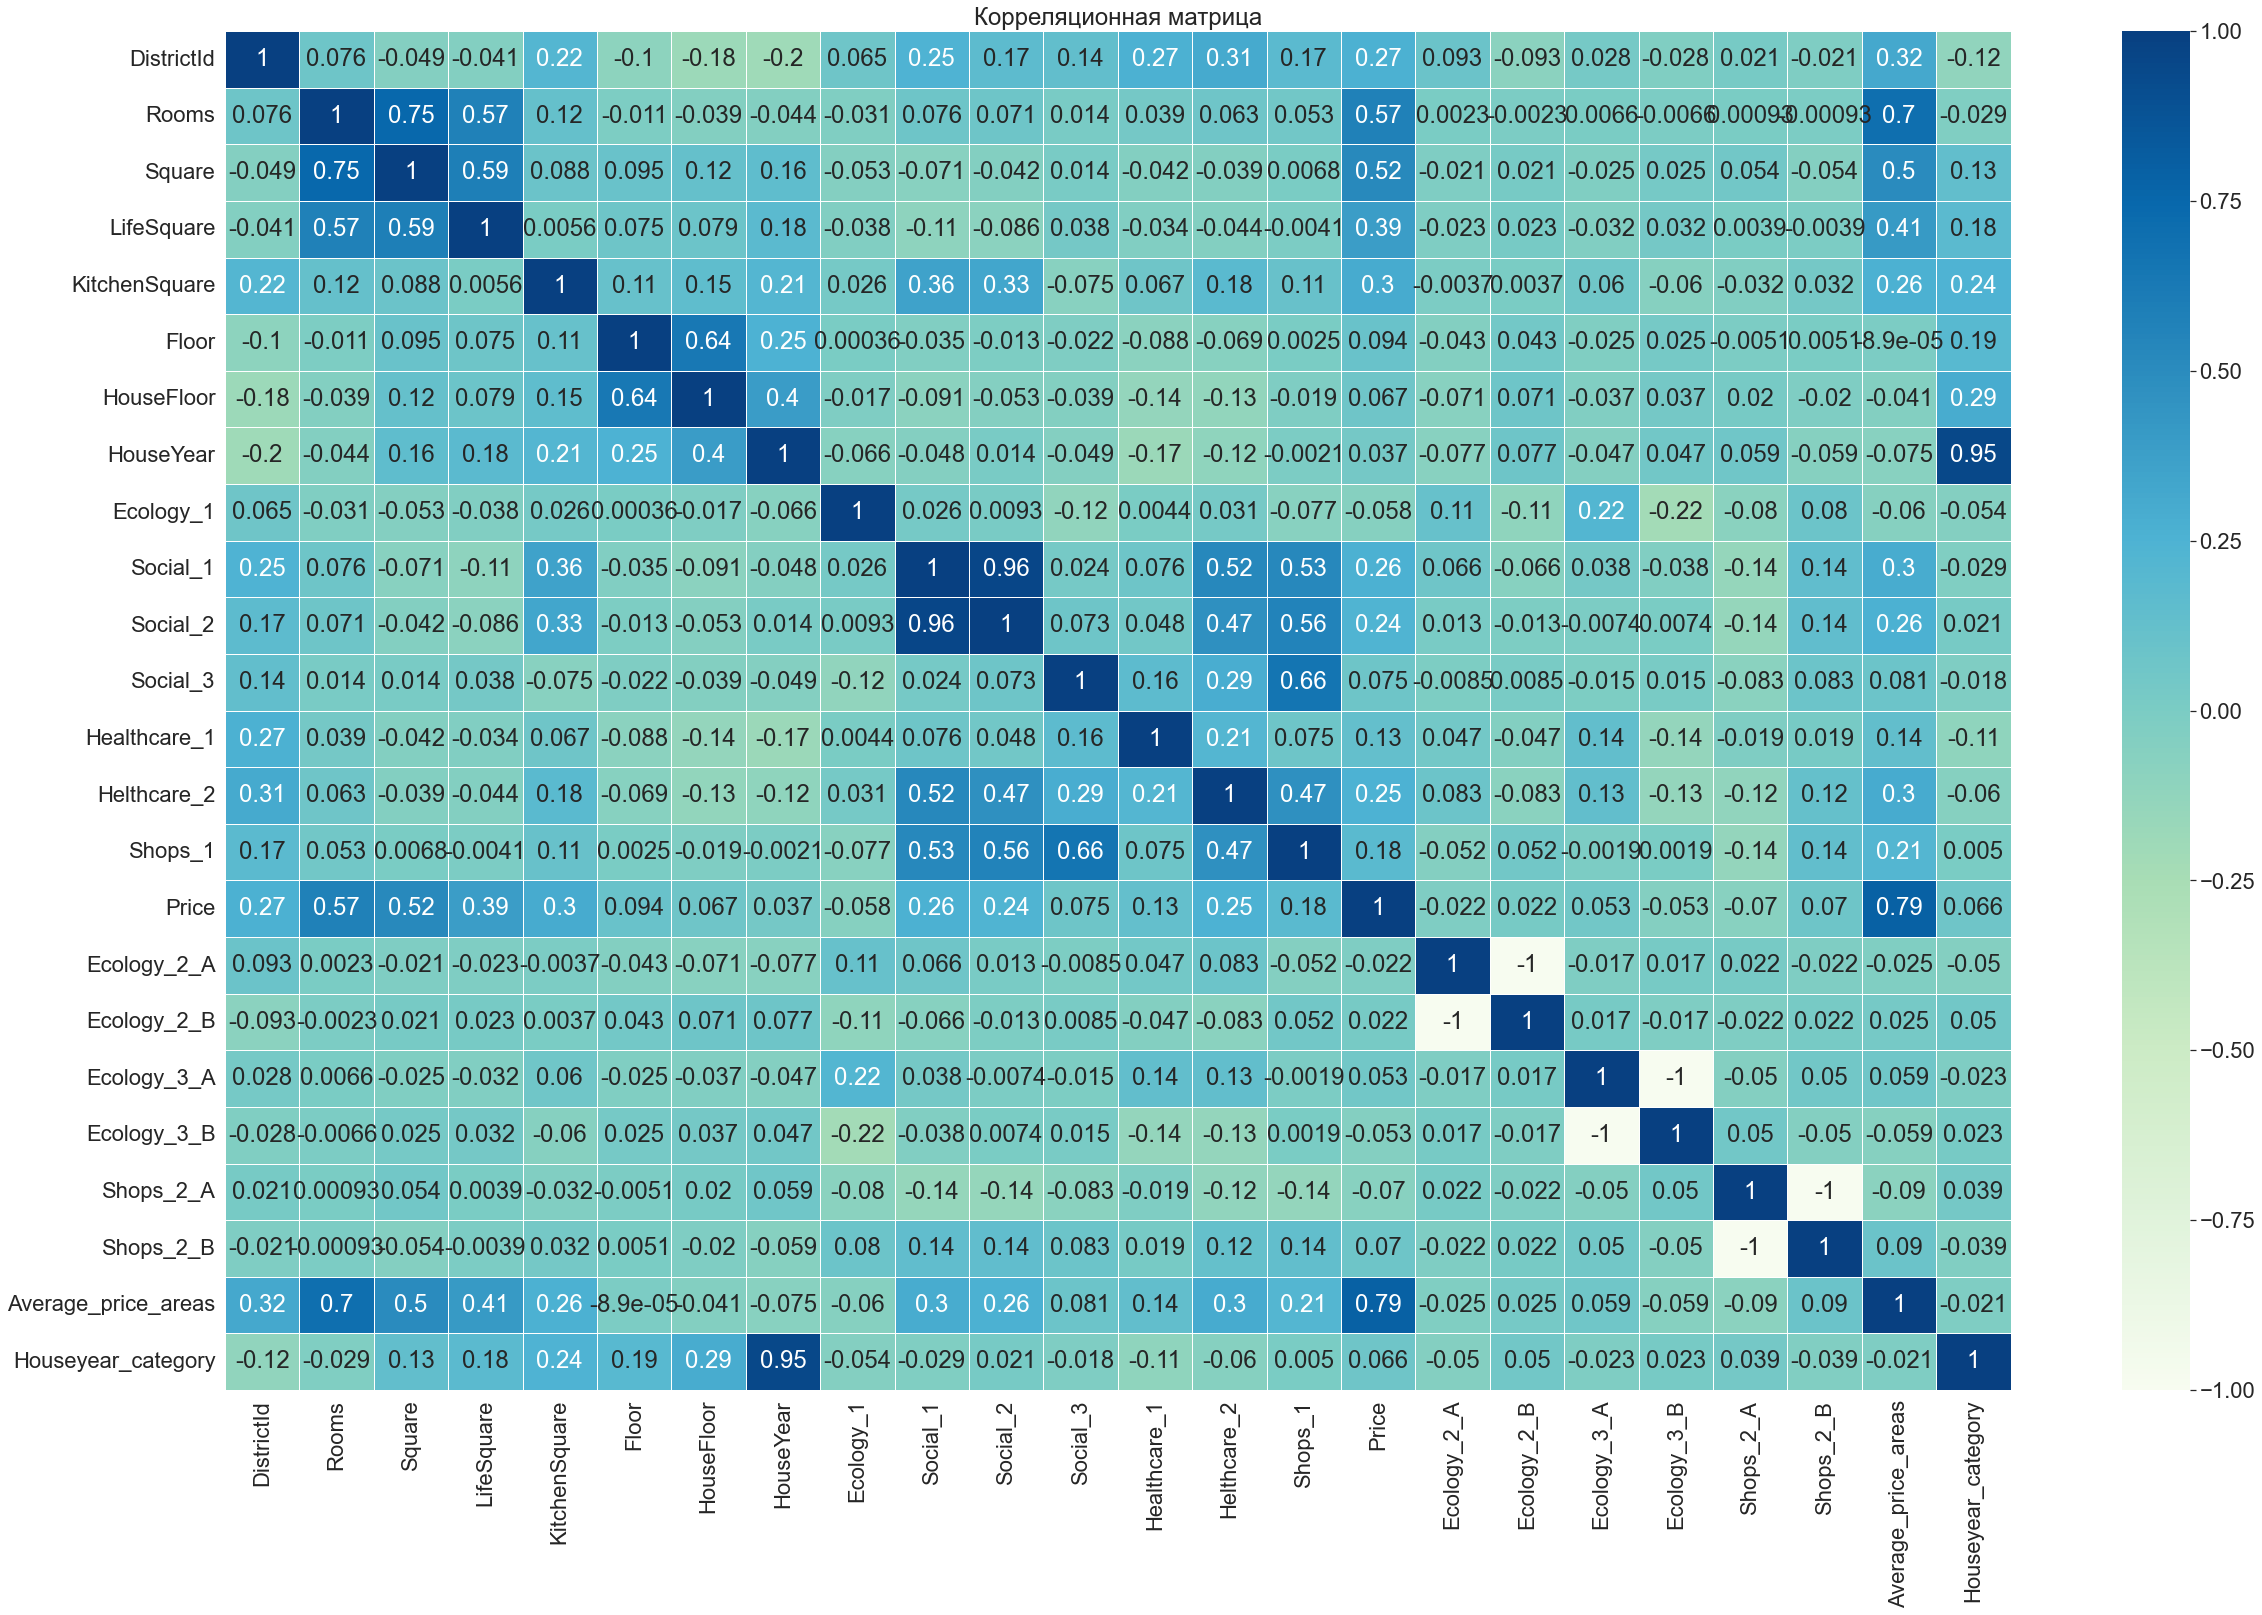

In [47]:
plt.figure(figsize = (40,25))

sns.set(font_scale=2)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Корреляционная матрица')
plt.show()

##### Удаление признака с высокой корреляцией 

In [48]:
df.drop(columns='Social_2', inplace=True)
df.drop(columns='HouseYear', inplace=True)

In [49]:
df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'Social_1',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B',
 'Average_price_areas',
 'Houseyear_category']

### Отбор признаков, которые необходимы для модели

In [50]:
feature_names = ['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'Social_1',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B',
 'Average_price_areas',
 'Houseyear_category']

target_name = 'Price'

In [51]:
df = df[feature_names + [target_name]]
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_3,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Average_price_areas,Houseyear_category,Price
0,35,2.0,47.981561,29.442751,6.0,7,9,0.089040,33,5,...,11,0,1,0,1,0,1,207786.135836,2.0,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9,0.000070,46,1,...,16,0,1,0,1,0,1,300009.450063,2.0,300009.450063
2,53,2.0,44.947953,29.197612,3.0,8,12,0.049637,34,0,...,3,0,1,0,1,0,1,263206.223152,2.0,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17,0.437885,23,3,...,5,0,1,0,1,0,1,166809.665642,2.0,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12,0.012339,35,1,...,4,0,1,0,1,0,1,158539.052715,2.0,150226.531644


In [52]:
df.dtypes

DistrictId               int64
Rooms                  float64
Square                 float64
LifeSquare             float64
KitchenSquare          float64
Floor                    int64
HouseFloor               int32
Ecology_1              float64
Social_1                 int64
Social_3                 int64
Healthcare_1           float64
Helthcare_2              int64
Shops_1                  int64
Ecology_2_A              uint8
Ecology_2_B              uint8
Ecology_3_A              uint8
Ecology_3_B              uint8
Shops_2_A                uint8
Shops_2_B                uint8
Average_price_areas    float64
Houseyear_category     float64
Price                  float64
dtype: object

### Нормализация признаков

In [53]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names])
df[feature_names] = pd.DataFrame(stand_features, columns=feature_names)

df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_3,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Average_price_areas,Houseyear_category,Price
0,-0.353348,0.137605,-0.468444,-0.444669,-0.085237,-0.074844,-0.647757,-0.250529,0.474169,-0.127533,...,1.408356,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,-0.048548,-0.694587,184966.930730
1,-0.215687,1.370628,0.695073,0.481647,0.630435,-0.074844,-0.647757,-0.998053,1.215681,-0.295384,...,2.448700,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,1.156339,-0.694587,300009.450063
2,0.059635,0.137605,-0.667836,-0.466078,-1.158744,0.126404,-0.154291,-0.581588,0.531208,-0.337347,...,-0.256195,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,0.675509,-0.694587,220925.908524
3,0.174352,0.137605,-0.115393,1.589192,0.988271,0.126404,0.668154,2.680470,-0.096225,-0.211458,...,0.159943,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,-0.583900,-0.694587,175616.227217
4,1.115034,-1.095417,-1.016111,-0.939545,0.272599,0.730146,-0.154291,-0.894969,0.588247,-0.295384,...,-0.048126,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864,-0.691955,-0.694587,150226.531644


### TRAIN / TAST

In [54]:
X = df[feature_names]
y = df[target_name]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [55]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum()

(0, 0)

### Построение модели

In [56]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

R2:	0.902
RMSE:	29037.49
MSE:	843175842.197


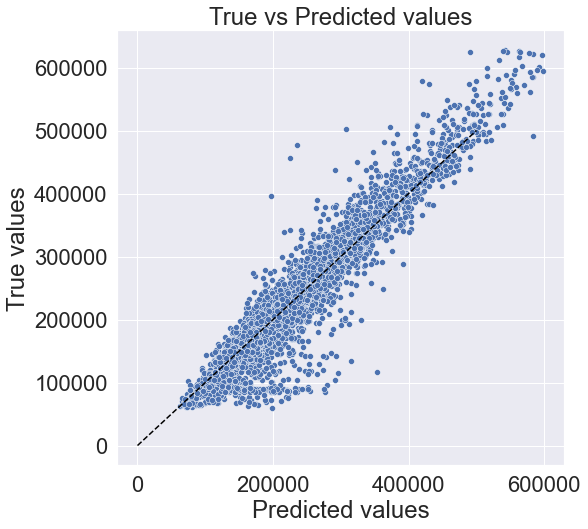

In [57]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.732
RMSE:	48057.935
MSE:	2309565123.024


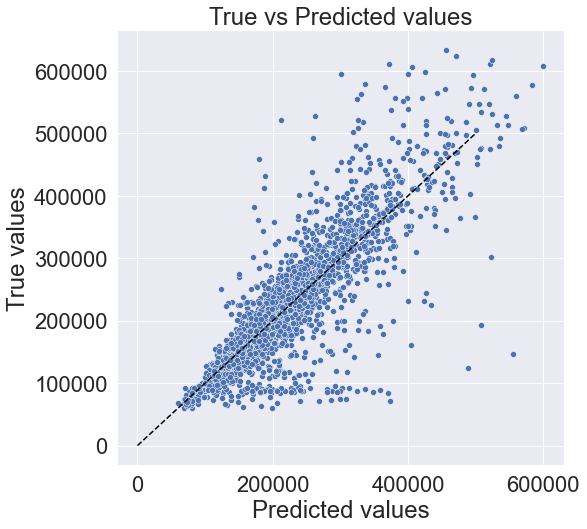

In [58]:
y_test_preds = gb_model.predict(X_valid)
evaluate_preds(y_valid, y_test_preds) 

### Кросс-валидация

In [59]:
cv_score = cross_val_score(gb_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.74066722, 0.71036818, 0.72910781])

In [60]:
cv_score.mean()

0.7267144010155566

### Преобразование X_test

In [61]:
X_test.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [62]:
#test_df['Id'] = train_df['Id'].astype(str)
#test_df['DistrictId'] = train_df['DistrictId'].astype(str)



median = X_test['LifeSquare'].median()
X_test['LifeSquare'].fillna(median, inplace=True)

median = X_test['Healthcare_1'].median()
X_test['Healthcare_1'].fillna(median, inplace=True)

X_test.replace(
    {'Rooms':
     {0: X_test['Rooms'].mode()[0]}
    },
    inplace=True)

X_test.loc[X_test['Rooms'] > 5, 'Rooms'] = X_test['Rooms'].median()

Square_max_value = np.quantile(X_test['Square'], q=0.975)
Square_min_value = np.quantile(X_test['Square'], q=0.025)
condition = (X_test['Square'] > Square_max_value) | (X_test['Square'] < Square_min_value)
X_test.loc[condition, 'Square'] = X_test['Square'].median()

LifeSquare_max_value = np.quantile(X_test['LifeSquare'], q=0.975)
LifeSquare_min_value = np.quantile(X_test['LifeSquare'], q=0.025)
life = (X_test['LifeSquare'] > LifeSquare_max_value) | (X_test['LifeSquare'] < LifeSquare_min_value)
X_test.loc[life, 'LifeSquare'] = X_test['LifeSquare'].median()

X_test['KitchenSquare'].quantile(.975), X_test['KitchenSquare'].quantile(.025)
condition = (X_test['KitchenSquare'].isna()) \
             | (X_test['KitchenSquare'] > X_test['KitchenSquare'].quantile(.975))
        
X_test.loc[condition, 'KitchenSquare'] = X_test['KitchenSquare'].median()

X_test.loc[X_test['KitchenSquare'] < 3, 'KitchenSquare'] = 3

X_test['HouseFloor'] = X_test['HouseFloor'].astype(int)

X_test.loc[X_test['Floor'] > 27, 'Floor'] = X_test['Floor'].median()

X_test.replace(
    {'HouseFloor':
     {0: X_test['HouseFloor'].mode()[0]}
    },
    inplace=True)

X_test.loc[X_test['HouseFloor'] > 27, 'HouseFloor'] = X_test['HouseFloor'].median()

transformation = X_test.loc[X_test['Floor'] > X_test['HouseFloor']].index
X_test.loc[transformation, 'Floor'] = X_test.loc[transformation, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

X_test['HouseYear'] = X_test['HouseYear'].astype(int)
X_test.loc[X_test['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2)
X_test.loc[X_test['HouseYear'] == 4968, 'HouseYear'] = 1968

X_test = pd.get_dummies(X_test)


X_test['Houseyear_category'] = 0
X_test.loc[X_test['HouseYear'] <= 1941, 'Houseyear_category'] = 1
X_test.loc[(X_test['HouseYear'] > 1941) & (X_test['HouseYear'] <= 1945), 'Houseyear_category'] = 2
X_test.loc[(X_test['HouseYear'] > 1945) & (X_test['HouseYear'] <= 1980), 'Houseyear_category'] = 3
X_test.loc[(X_test['HouseYear'] > 1980) & (X_test['HouseYear'] <= 2000), 'Houseyear_category'] = 4
X_test.loc[(X_test['HouseYear'] > 2000) & (X_test['HouseYear'] <= 2010), 'Houseyear_category'] = 5
X_test.loc[(X_test['HouseYear'] > 2010), 'Houseyear_category'] = 6


bins = [X_test['HouseYear'].min(), 1941, 1945, 1980, 2000, 2010, X_test['HouseYear'].max()]
X_test['Houseyear_category'] = pd.cut(X_test['HouseYear'], bins=bins, labels=False)
    
X_test['Houseyear_category'].fillna(-1, inplace=True)

X_test['Average_price_areas'] = X_train['Average_price_areas']
median = X_test['Average_price_areas'].median()
X_test['Average_price_areas'].fillna(median, inplace=True)

X_test.drop(columns='Id', inplace=True)
X_test.drop(columns='Social_2', inplace=True)
X_test.drop(columns='HouseYear', inplace=True)

In [63]:
X_test.tail()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_3,...,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Houseyear_category,Average_price_areas
4995,11,3.0,67.133911,50.809797,6.0,5,9,0.000170,36,0,...,1,1,0,1,0,1,0,1,2.0,-0.210002
4996,1,1.0,40.198472,21.807061,10.0,12,17,0.007122,1,0,...,0,1,0,1,0,1,0,1,5.0,1.020196
4997,12,3.0,77.842178,48.282625,9.0,11,22,0.090799,74,2,...,5,15,0,1,0,1,0,1,3.0,-0.598393
4998,62,2.0,81.305222,32.925087,3.0,4,17,0.072158,2,1,...,0,0,0,1,0,1,1,0,2.0,1.671162
4999,30,2.0,60.555693,32.925087,3.0,10,17,0.000078,22,141,...,3,23,0,1,0,1,0,1,2.0,-1.076478


In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DistrictId           5000 non-null   int64  
 1   Rooms                5000 non-null   float64
 2   Square               5000 non-null   float64
 3   LifeSquare           5000 non-null   float64
 4   KitchenSquare        5000 non-null   float64
 5   Floor                5000 non-null   int64  
 6   HouseFloor           5000 non-null   int32  
 7   Ecology_1            5000 non-null   float64
 8   Social_1             5000 non-null   int64  
 9   Social_3             5000 non-null   int64  
 10  Healthcare_1         5000 non-null   float64
 11  Helthcare_2          5000 non-null   int64  
 12  Shops_1              5000 non-null   int64  
 13  Ecology_2_A          5000 non-null   uint8  
 14  Ecology_2_B          5000 non-null   uint8  
 15  Ecology_3_A          5000 non-null   u

### Нормализация X_test

In [65]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(X_test[feature_names])
X_test[feature_names] = pd.DataFrame(stand_features, columns=feature_names)

X_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_3,...,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Houseyear_category,Average_price_areas
0,0.152140,0.116398,-0.364265,-0.109953,-0.076427,-0.294460,0.180856,1.585280,-0.794834,-0.304366,...,-0.891612,-0.888194,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,-0.668129,-0.173825
1,0.514336,0.116398,0.903687,-0.154395,-1.176623,-1.291008,-1.948018,-0.367283,-1.080052,-0.220549,...,-0.891612,-0.469511,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,-0.668129,1.443428
2,3.140252,-1.124521,-0.165461,-1.640490,2.123965,-1.091699,-1.292980,-0.998468,0.288994,3.299785,...,2.487242,0.158513,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,-2.372106,0.874300
3,-0.096869,0.116398,1.151214,1.510180,1.023769,2.894494,1.490933,-0.149940,-0.110311,-0.220549,...,1.135700,-0.260169,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,1.035847,-0.173825
4,-0.549613,-1.124521,-0.518373,0.761455,-1.176623,1.897946,0.672135,-0.397445,-1.308227,-0.304366,...,-0.891612,-0.888194,-0.098453,0.098453,-0.175258,0.175258,3.337053,-3.337053,1.887836,-0.744283


### Предсказание цены для тестового датасета

In [66]:
y_test_preds = gb_model.predict(X_test)

In [67]:
y_test_preds

array([162167.9810897 , 183751.45791543, 162510.59653857, ...,
       338317.32216512, 177397.08258008, 190606.03127898])

In [68]:
X_test['Price'] = y_test_preds
X_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_3,...,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Houseyear_category,Average_price_areas,Price
0,0.152140,0.116398,-0.364265,-0.109953,-0.076427,-0.294460,0.180856,1.585280,-0.794834,-0.304366,...,-0.888194,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,-0.668129,-0.173825,162167.981090
1,0.514336,0.116398,0.903687,-0.154395,-1.176623,-1.291008,-1.948018,-0.367283,-1.080052,-0.220549,...,-0.469511,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,-0.668129,1.443428,183751.457915
2,3.140252,-1.124521,-0.165461,-1.640490,2.123965,-1.091699,-1.292980,-0.998468,0.288994,3.299785,...,0.158513,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,-2.372106,0.874300,162510.596539
3,-0.096869,0.116398,1.151214,1.510180,1.023769,2.894494,1.490933,-0.149940,-0.110311,-0.220549,...,-0.260169,-0.098453,0.098453,-0.175258,0.175258,-0.299666,0.299666,1.035847,-0.173825,344995.325708
4,-0.549613,-1.124521,-0.518373,0.761455,-1.176623,1.897946,0.672135,-0.397445,-1.308227,-0.304366,...,-0.888194,-0.098453,0.098453,-0.175258,0.175258,3.337053,-3.337053,1.887836,-0.744283,346018.596355


### Сравление цены на df и на X_test

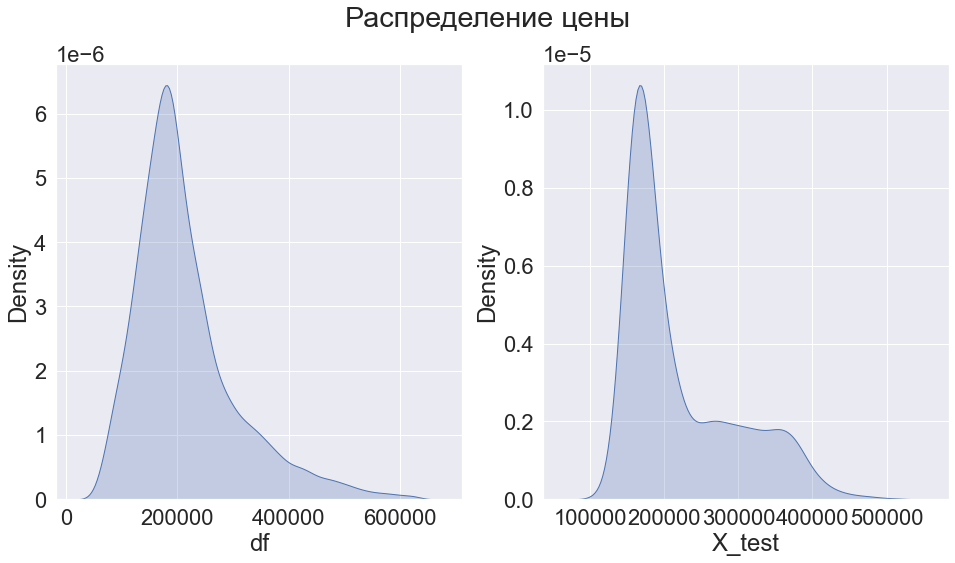

In [69]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('df')

plt.subplot(122)
sns.kdeplot(X_test['Price'], shade=True, legend=False)
plt.xlabel('X_test')

plt.suptitle('Распределение цены')
plt.show()

### Сохранение результата

In [70]:
X_test.to_csv('predictions.csv', index=False)